In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data = train_data.drop(["Loan_ID"], axis = 1)

In [5]:
test_data = pd.read_csv('test_lAUu6dG.csv')

In [6]:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [7]:
test_data = test_data.drop(["Loan_ID"], axis = 1)

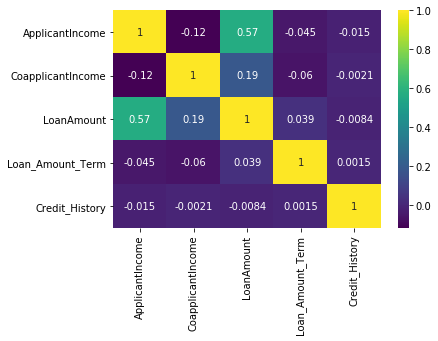

In [8]:
sns.heatmap(train_data.corr(),cmap = 'viridis',annot = True)

In [9]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Train data preprocessing
#  Handling Missing Values in Categorical data 

In [10]:
train_data["Gender"].fillna((train_data['Gender'].mode()[0]),inplace = True)

In [11]:
train_data["Married"].fillna((train_data['Married'].mode()[0]),inplace = True)

In [12]:
train_data["Self_Employed"].fillna((train_data['Self_Employed'].mode()[0]),inplace = True)

In [13]:
train_data.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling missing values in numerical data

In [14]:
train_data["Credit_History"].fillna((train_data['Credit_History'].mode()[0]),inplace = True)

In [15]:
train_data["Dependents"].fillna((train_data['Dependents'].mode()[0]),inplace = True)

In [16]:
train_data['Dependents'] = train_data['Dependents'].apply(lambda x: 3 if(x == '3+') else x)

In [17]:
train_data["Loan_Amount_Term"].fillna((train_data['Loan_Amount_Term'].median()),inplace = True)

In [18]:
train_data['LoanAmount'].fillna((train_data['LoanAmount'].mean()),inplace = True)

In [19]:
train_data['Dependents'] = train_data['Dependents'].apply(lambda x: int(x))

In [20]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Label encoding for Categorical data

In [26]:
train_data["Gender"] = train_data["Gender"].astype('category')
train_data["Gender"] = train_data["Gender"].cat.codes

In [27]:
train_data["Married"] = train_data["Married"].astype('category')
train_data["Married"] = train_data["Married"].cat.codes

In [28]:
train_data["Education"] = train_data["Education"].astype('category')
train_data["Education"] = train_data["Education"].cat.codes

In [29]:
train_data["Self_Employed"] = train_data["Self_Employed"].astype('category')
train_data["Self_Employed"] = train_data["Self_Employed"].cat.codes

In [30]:
train_data["Property_Area"] = train_data["Property_Area"].astype('category')
train_data["Property_Area"] = train_data["Property_Area"].cat.codes

In [31]:
train_data["Loan_Status"] = train_data["Loan_Status"].astype('category')
train_data["Loan_Status"] = train_data["Loan_Status"].cat.codes

In [32]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Visualization of Training Data

In [33]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt

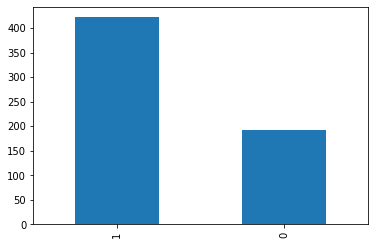

In [34]:
train_data['Loan_Status'].value_counts().plot.bar()

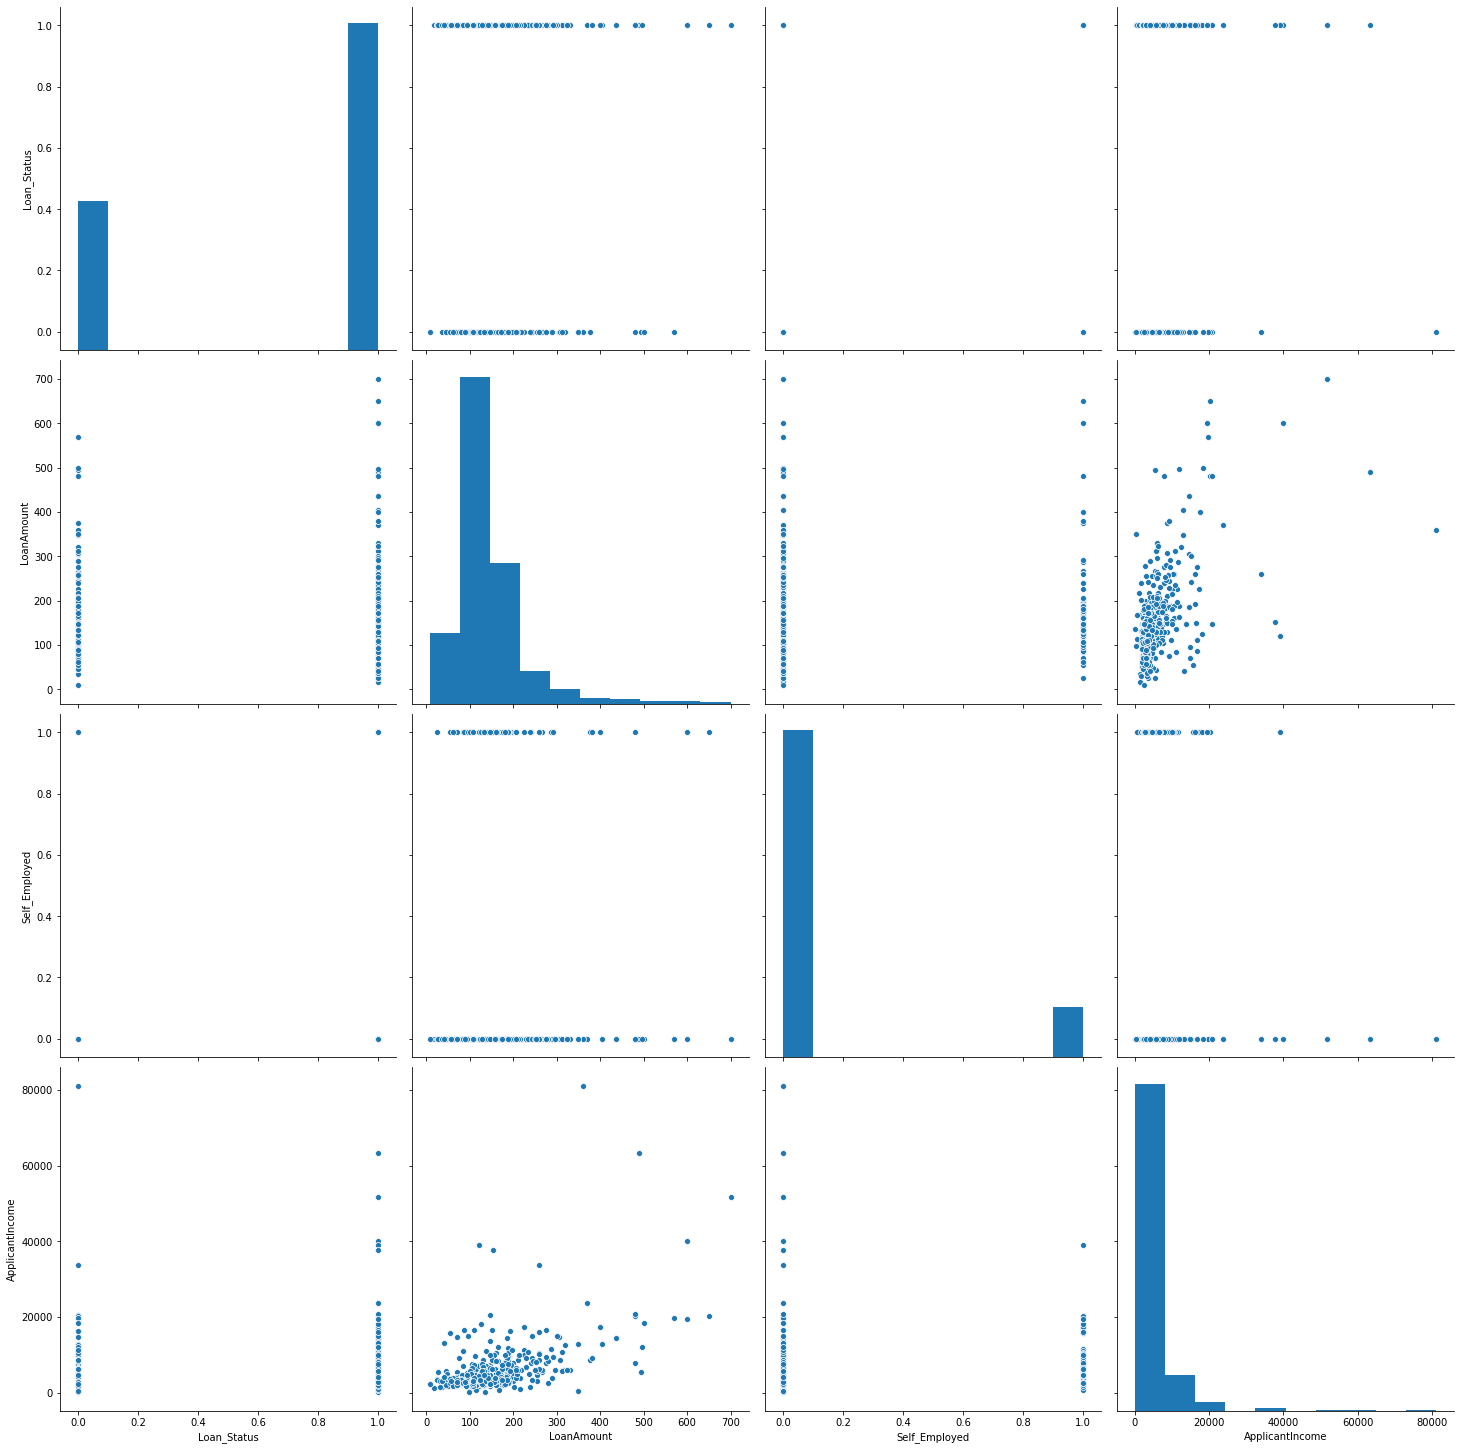

In [35]:
import seaborn as sns
sns.pairplot(train_data, height =5, vars = ["Loan_Status", "LoanAmount", "Self_Employed", "ApplicantIncome"])


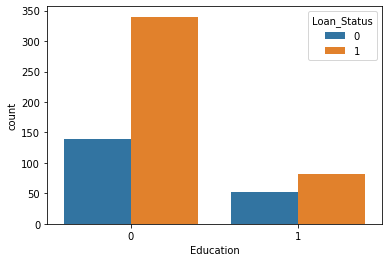

In [36]:
sns.countplot(x = 'Education',data = train_data,hue = 'Loan_Status')

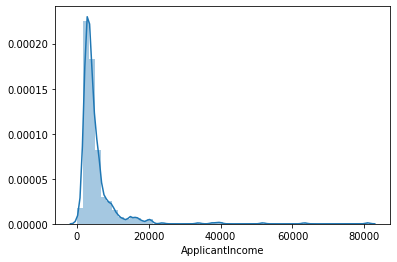

In [37]:
sns.distplot(train_data['ApplicantIncome'])

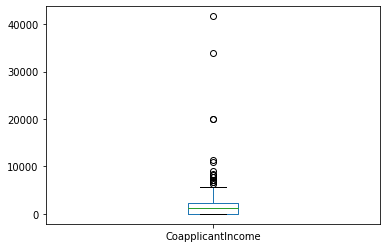

In [38]:
train_data['CoapplicantIncome'].plot(kind = 'box')

# Test Data Processing 

In [39]:
test_data["Gender"].fillna((test_data['Gender'].mode()[0]),inplace = True)

In [40]:
test_data["Married"].fillna((test_data['Married'].mode()[0]),inplace = True)

In [41]:
test_data["Self_Employed"].fillna((test_data['Self_Employed'].mode()[0]),inplace = True)

# Handling missing Values in Numerical data columns

In [42]:
test_data['LoanAmount'].fillna((test_data['LoanAmount'].mean()),inplace = True)

In [43]:
test_data["Dependents"].fillna((test_data['Dependents'].mode()[0]),inplace = True)

In [44]:
test_data['Dependents'] = test_data['Dependents'].apply(lambda x: 3 if(x == '3+') else x)

In [45]:
test_data['Dependents'] = test_data['Dependents'].apply(lambda x: int(x))

In [46]:
test_data["Credit_History"].fillna((test_data['Credit_History'].mode()[0]),inplace = True)

In [47]:
test_data["Loan_Amount_Term"].fillna((test_data['Loan_Amount_Term'].median()),inplace = True)

In [48]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Label encoding the categorical data

In [49]:
test_data["Gender"] = test_data["Gender"].astype('category')
test_data["Gender"] = test_data["Gender"].cat.codes

In [50]:
test_data["Married"] = test_data["Married"].astype('category')
test_data["Married"] = test_data["Married"].cat.codes

In [51]:
test_data["Education"] = test_data["Education"].astype('category')
test_data["Education"] = test_data["Education"].cat.codes

In [52]:
test_data["Self_Employed"] = test_data["Self_Employed"].astype('category')
test_data["Self_Employed"] = test_data["Self_Employed"].cat.codes

In [53]:
test_data["Property_Area"] = test_data["Property_Area"].astype('category')
test_data["Property_Area"] = test_data["Property_Area"].cat.codes

In [54]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


# Train - test data split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = train_data.drop(['Loan_Status'],axis = 1)

In [57]:
y = train_data['Loan_Status']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using Knn model 

In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [98]:
import math
math.sqrt(len(y_test))

13.601470508735444

In [99]:
X_pred = classifier.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_pred)
print(cm)

[[ 25  38]
 [  3 119]]


In [101]:
y_pred = classifier.predict(test_data)

In [102]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [103]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i )
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    

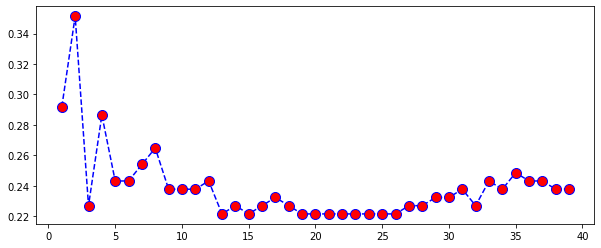

In [104]:
plt.figure(figsize = (10,4))
plt.plot(range(1,40),error_rate,color = 'blue',ls = '--',marker = 'o',markerfacecolor = 'red',markersize = 10)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(X_train,y_train)
pred  = knn.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185

[[ 25  38]
 [  3 119]]


In [107]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [108]:
submission['Loan_Status']=y_pred 
dummy = pd.read_csv('test_lAUu6dG.csv')
dummy1 = dummy['Loan_ID']
submission['Loan_ID']=dummy1
index = ["Loan_ID"] 


In [109]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [110]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,Y


In [111]:
submission.to_csv('final_2.csv', index = False)